In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cur_qc = pd.read_csv("combined-QC.csv")
# in this notebook focusing only on transcript structure - followup to previous work
cur_qc.dropna(subset=["num_words_S1"],inplace=True)

In [20]:
cur_qc["total_words"] = cur_qc["num_words_S1"] + cur_qc["num_words_S2"] + cur_qc["num_words_S3"]
cur_qc["inaudible_rate"] = cur_qc["num_inaudible"]/cur_qc["total_words"]
cur_qc["redaction_rate"] = cur_qc["num_redacted"]/cur_qc["total_words"]
cur_qc["total_turns"] = cur_qc["num_turns_S1"] + cur_qc["num_turns_S2"] + cur_qc["num_turns_S3"]
cur_qc["max_speaker_words"] = [max(x,y,z) for x,y,z in zip(cur_qc["num_words_S1"].tolist(),cur_qc["num_words_S2"].tolist(),cur_qc["num_words_S3"].tolist())]
cur_qc["max_speaker_turns"] = [max(x,y,z) for x,y,z in zip(cur_qc["num_turns_S1"].tolist(),cur_qc["num_turns_S2"].tolist(),cur_qc["num_turns_S3"].tolist())]
cur_qc["speech_frac"] = cur_qc["max_speaker_words"]/cur_qc["total_words"]
cur_qc["words_per_turn"] = cur_qc["total_words"]/cur_qc["total_turns"]

cur_qc["max_speaker_id"] = [[x,y,z].index(max(x,y,z)) for x,y,z in zip(cur_qc["num_words_S1"].tolist(),cur_qc["num_words_S2"].tolist(),cur_qc["num_words_S3"].tolist())]
cur_qc["max_speaker_id_string"] = ["S" + str(x+1) for x in cur_qc["max_speaker_id"].tolist()]
cur_qc["second_highest_words"] = [sorted([x,y,z],reverse=True)[1] for x,y,z in zip(cur_qc["num_words_S1"].tolist(),cur_qc["num_words_S2"].tolist(),cur_qc["num_words_S3"].tolist())]
cur_qc["second_speaker_id"] = [[x,y,z].index(s) for x,y,z,s in zip(cur_qc["num_words_S1"].tolist(),cur_qc["num_words_S2"].tolist(),cur_qc["num_words_S3"].tolist(),cur_qc["second_highest_words"].tolist())]
cur_qc["second_speaker_id_string"] = ["S" + str(x+1) for x in cur_qc["second_speaker_id"].tolist()]
cur_qc["max_speaker_id_turns"] = [[x,y,z][i] for x,y,z,i in zip(cur_qc["num_turns_S1"].tolist(),cur_qc["num_turns_S2"].tolist(),cur_qc["num_turns_S3"].tolist(),cur_qc["max_speaker_id"].tolist())]
cur_qc["second_speaker_id_turns"] = [[x,y,z][i] for x,y,z,i in zip(cur_qc["num_turns_S1"].tolist(),cur_qc["num_turns_S2"].tolist(),cur_qc["num_turns_S3"].tolist(),cur_qc["second_speaker_id"].tolist())]
cur_qc["max_speaker_words_per_turn"] = cur_qc["max_speaker_words"]/cur_qc["max_speaker_id_turns"]
cur_qc["second_speaker_words_per_turn"] = cur_qc["second_highest_words"]/cur_qc["second_speaker_id_turns"]
cur_qc["second_speaker_speech_frac"] = cur_qc["second_highest_words"]/cur_qc["total_words"]
cur_qc["S1_words_per_turn"] = cur_qc["num_words_S1"]/cur_qc["num_turns_S1"]
cur_qc["S1_speech_frac"] = cur_qc["num_words_S1"]/cur_qc["total_words"]
cur_qc["S2_words_per_turn"] = cur_qc["num_words_S2"]/cur_qc["num_turns_S2"]
cur_qc["S2_speech_frac"] = cur_qc["num_words_S2"]/cur_qc["total_words"]

In [21]:
opens = cur_qc[cur_qc["interview_type"]=="open"]
psychs = cur_qc[cur_qc["interview_type"]=="psychs"]

### Counting Stats

In [11]:
# number of speakers in the transcript by site
cur_qc[cur_qc["num_subjects"]==5]

,study,patient,interview_type,day,interview_number,length_minutes,overall_db,amplitude_stdev,mean_flatness,minimum_faces_detected_in_frame,...,max_speaker_id,max_speaker_id_string,second_highest_words,second_speaker_id,second_speaker_id_string,max_speaker_id_turns,second_speaker_id_turns,max_speaker_words_per_turn,second_speaker_words_per_turn,second_speaker_speech_frac
252,PronetWU,WU08865,psychs,1,2,32.29,67.34,0.047,0.0083,NaN,...,1,S2,1210.0,0,S1,107.0,114.0,14.523364,10.614035,0.425607


In [12]:
cur_qc[cur_qc["num_subjects"]==4]

,study,patient,interview_type,day,interview_number,length_minutes,overall_db,amplitude_stdev,mean_flatness,minimum_faces_detected_in_frame,...,max_speaker_id,max_speaker_id_string,second_highest_words,second_speaker_id,second_speaker_id_string,max_speaker_id_turns,second_speaker_id_turns,max_speaker_words_per_turn,second_speaker_words_per_turn,second_speaker_speech_frac
38,PronetLA,LA08975,psychs,4,1,94.34,77.15,0.144,0.0231,0.0,...,0,S1,1712.0,1,S2,279.0,246.0,10.405018,6.959350,0.349888
188,PronetPI,PI08769,psychs,1,1,51.13,61.25,0.023,0.0048,1.0,...,2,S3,1187.0,1,S2,134.0,93.0,13.261194,12.763441,0.399798
248,PronetWU,WU06851,psychs,149,6,44.10,67.35,0.047,0.0066,NaN,...,0,S1,1166.0,1,S2,146.0,139.0,11.760274,8.388489,0.404159
251,PronetWU,WU08865,psychs,1,1,52.95,66.91,0.044,0.0060,NaN,...,2,S3,1238.0,1,S2,110.0,103.0,15.036364,12.019417,0.418102


In [18]:
cur_qc_int = cur_qc[cur_qc["num_subjects"]<4]
cur_qc_int[["num_subjects","interview_type","day"]].groupby(["num_subjects",pd.Categorical(cur_qc_int.interview_type)]).count().fillna(0).astype(int)[["day"]]

day
num_subjects            
2.0          open     70
             psychs  113
3.0          open      6
             psychs   23

In [15]:
cur_qc_int = cur_qc[cur_qc["num_subjects"]<4]
cur_qc_int[["num_subjects","study","interview_type","day"]].groupby(["num_subjects",pd.Categorical(cur_qc_int.study),pd.Categorical(cur_qc_int.interview_type)]).count().fillna(0).astype(int)[["day"]]

day
num_subjects                     
2.0          PronetLA open     10
                      psychs    9
             PronetNC open     13
                      psychs   27
             PronetNL open      0
                      psychs    2
             PronetNN open      8
                      psychs    9
             PronetOR open      6
                      psychs   10
             PronetPA open      9
                      psychs    4
             PronetPI open      0
                      psychs    3
             PronetTE open      5
                      psychs    6
             PronetWU open      7
                      psychs   17
             PronetYA open     12
                      psychs   26
3.0          PronetLA open      1
                      psychs    3
             PronetNC open      0
                      psychs    4
             PronetNL open      0
                      psychs    0
             PronetNN open      0
                      psychs    0
             PronetOR open      0
                      psychs    2
             PronetPA open      0
                      psychs    4
             PronetPI open      1
                      psychs    3
             PronetTE open      0
                      psychs    0
             PronetWU open      1
                      psychs    7
             PronetYA open      3
                      psychs    0

In [16]:
# now look at identity of top speaker
cur_qc[cur_qc["max_speaker_id_string"]=="S3"]

,study,patient,interview_type,day,interview_number,length_minutes,overall_db,amplitude_stdev,mean_flatness,minimum_faces_detected_in_frame,...,max_speaker_id,max_speaker_id_string,second_highest_words,second_speaker_id,second_speaker_id_string,max_speaker_id_turns,second_speaker_id_turns,max_speaker_words_per_turn,second_speaker_words_per_turn,second_speaker_speech_frac
111,PronetNC,NC10194,psychs,1,1,80.08,64.14,0.032,0.0206,3.0,...,2,S3,1573.0,0,S1,287.0,278.0,12.324042,5.658273,0.296904
119,PronetYA,YA02457,open,106,2,12.13,70.14,0.064,0.0171,1.0,...,2,S3,280.0,1,S2,22.0,22.0,31.727273,12.727273,0.285423
124,PronetYA,YA03473,open,15,1,12.52,71.75,0.077,0.0117,2.0,...,2,S3,245.0,1,S2,19.0,19.0,54.157895,12.894737,0.191856
136,PronetYA,YA05293,open,78,2,17.56,66.84,0.044,0.0113,2.0,...,2,S3,248.0,1,S2,26.0,26.0,98.269231,9.538462,0.088382
178,PronetPI,PI01155,open,17,1,10.97,67.37,0.047,0.0072,1.0,...,2,S3,512.0,1,S2,40.0,41.0,19.325000,12.487805,0.397516
188,PronetPI,PI08769,psychs,1,1,51.13,61.25,0.023,0.0048,1.0,...,2,S3,1187.0,1,S2,134.0,93.0,13.261194,12.763441,0.399798
251,PronetWU,WU08865,psychs,1,1,52.95,66.91,0.044,0.0060,NaN,...,2,S3,1238.0,1,S2,110.0,103.0,15.036364,12.019417,0.418102
262,PronetWU,WU09592,psychs,43,2,61.92,59.36,0.019,0.0116,NaN,...,2,S3,987.0,1,S2,76.0,78.0,32.973684,12.653846,0.278107


In [19]:
cur_qc_int = cur_qc[cur_qc["max_speaker_id_string"]!="S3"]
cur_qc_int[["max_speaker_id_string","interview_type","day"]].groupby(["max_speaker_id_string",pd.Categorical(cur_qc_int.interview_type)]).count().fillna(0).astype(int)[["day"]]

day
max_speaker_id_string            
S1                    open     11
                      psychs   80
S2                    open     61
                      psychs   57

In [17]:
cur_qc_int = cur_qc[cur_qc["max_speaker_id_string"]!="S3"]
cur_qc_int[["max_speaker_id_string","study","interview_type","day"]].groupby(["max_speaker_id_string",pd.Categorical(cur_qc_int.study),pd.Categorical(cur_qc_int.interview_type)]).count().fillna(0).astype(int)[["day"]]

day
max_speaker_id_string                     
S1                    PronetLA open      4
                               psychs    7
                      PronetNC open      1
                               psychs   26
                      PronetNL open      0
                               psychs    2
                      PronetNN open      0
                               psychs    5
                      PronetOR open      0
                               psychs    5
                      PronetPA open      3
                               psychs    5
                      PronetPI open      0
                               psychs    2
                      PronetTE open      1
                               psychs    4
                      PronetWU open      1
                               psychs   11
                      PronetYA open      1
                               psychs   13
S2                    PronetLA open      7
                               psychs    6
                      PronetNC open     12
                               psychs    4
                      PronetNL open      0
                               psychs    0
                      PronetNN open      8
                               psychs    4
                      PronetOR open      6
                               psychs    7
                      PronetPA open      6
                               psychs    3
                      PronetPI open      0
                               psychs    4
                      PronetTE open      4
                               psychs    2
                      PronetWU open      7
                               psychs   14
                      PronetYA open     11
                               psychs   13

### Speaker ID Scatter Plots
S1 should theoretically be the main (and only in open case) interviewer, as they should speak first - but no guarantee protocol is being followed

<AxesSubplot:xlabel='S1_speech_frac', ylabel='S1_words_per_turn'>

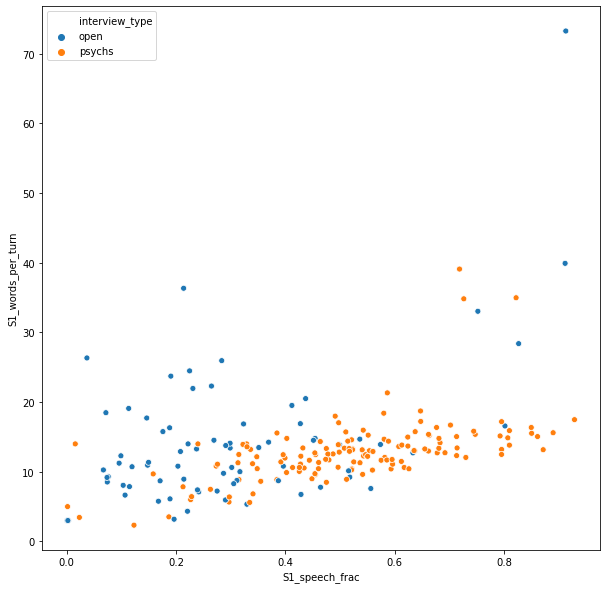

In [22]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="S1_speech_frac",y="S1_words_per_turn",hue="interview_type")

<AxesSubplot:xlabel='S2_speech_frac', ylabel='S2_words_per_turn'>

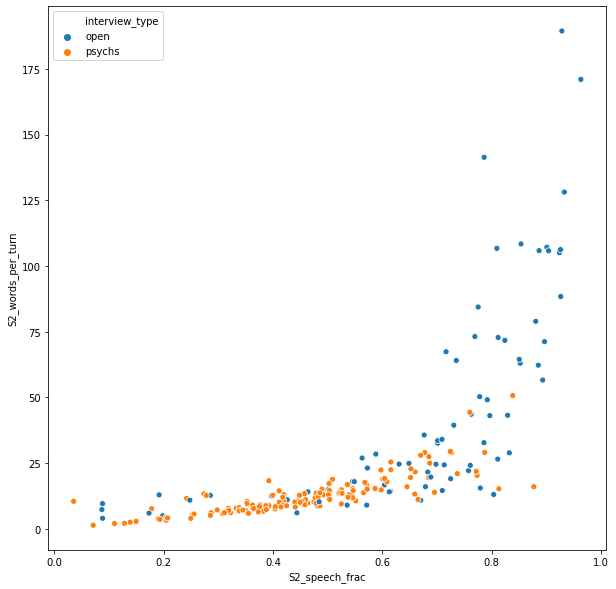

In [23]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="S2_speech_frac",y="S2_words_per_turn",hue="interview_type")

In [28]:
# match the site coloring order that was used in scatters in previous notebook
hue_order = ["PronetLA","PronetOR","PronetNL","PronetNC","PronetYA","PronetPA","PronetPI","PronetNN","PronetTE","PronetWU"]

Text(0.5, 1.0, 'open')

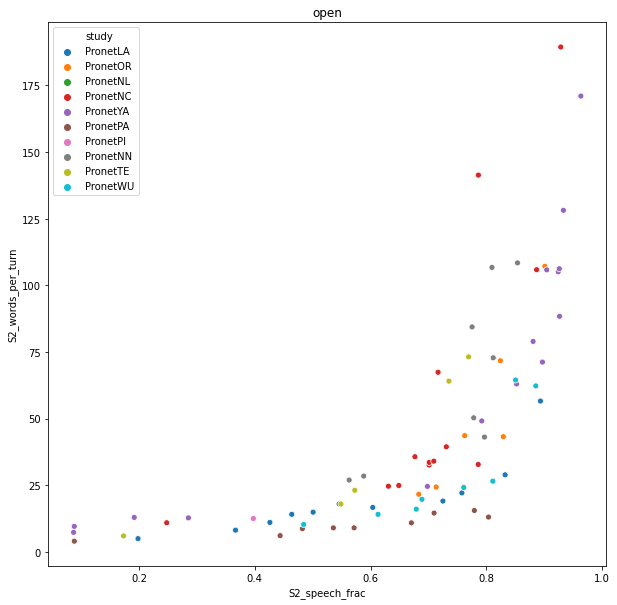

In [29]:
# focus mainly on open interviews
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="S2_speech_frac",y="S2_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

Text(0.5, 1.0, 'open')

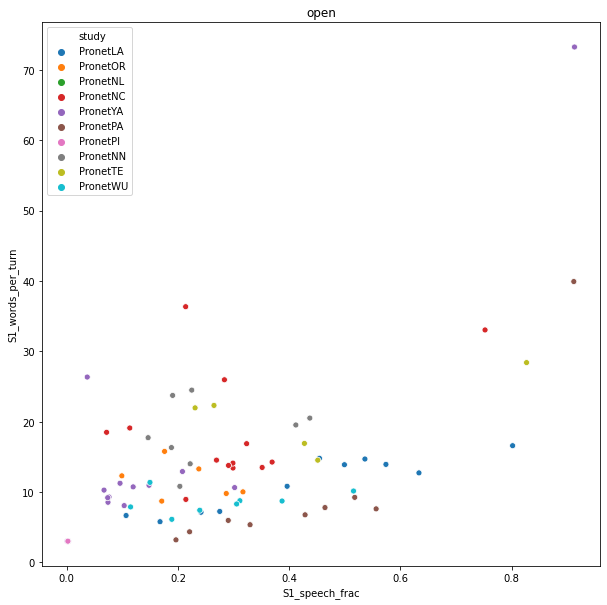

In [30]:
plt.figure(figsize=(10,10))
# S2 seems most interesting for opens, but also check S1
sns.scatterplot(data=opens,x="S1_speech_frac",y="S1_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

(0.0, 30.0)

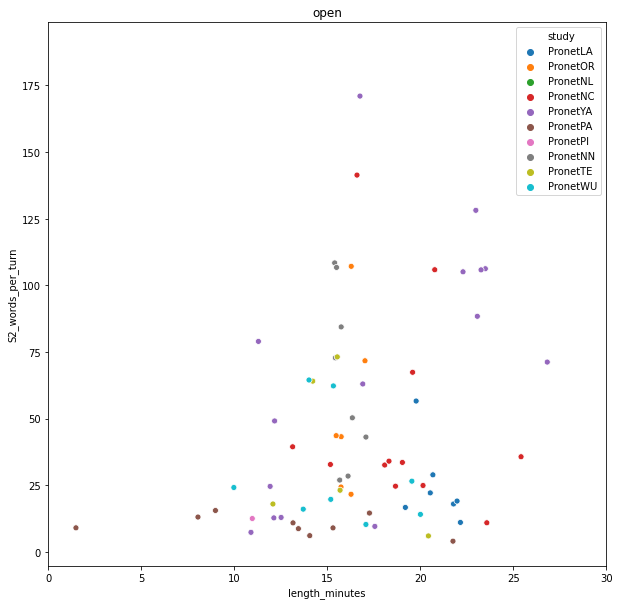

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="length_minutes",y="S2_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")
plt.xlim(0,30)

(0.0, 30.0)

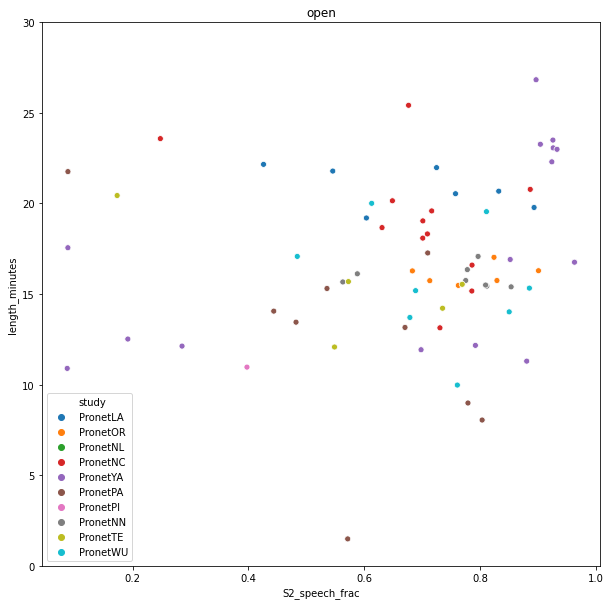

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="S2_speech_frac",y="length_minutes",hue="study",hue_order=hue_order)
plt.title("open")
plt.ylim(0,30)

Text(0.5, 1.0, 'open')

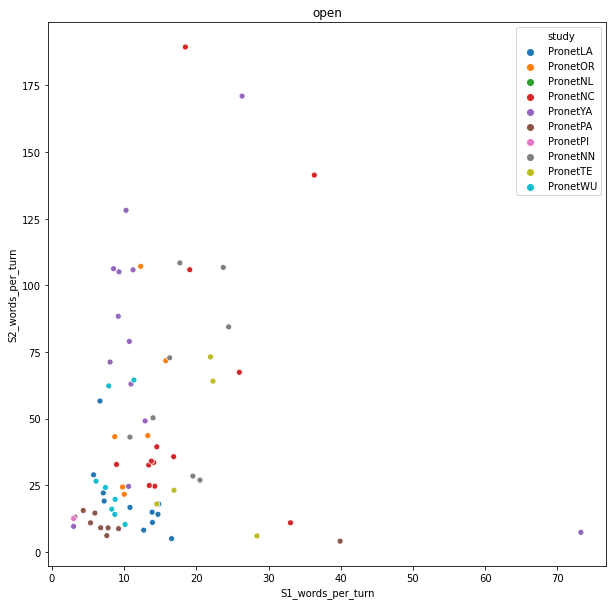

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="S1_words_per_turn",y="S2_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

(0.0, 40.0)

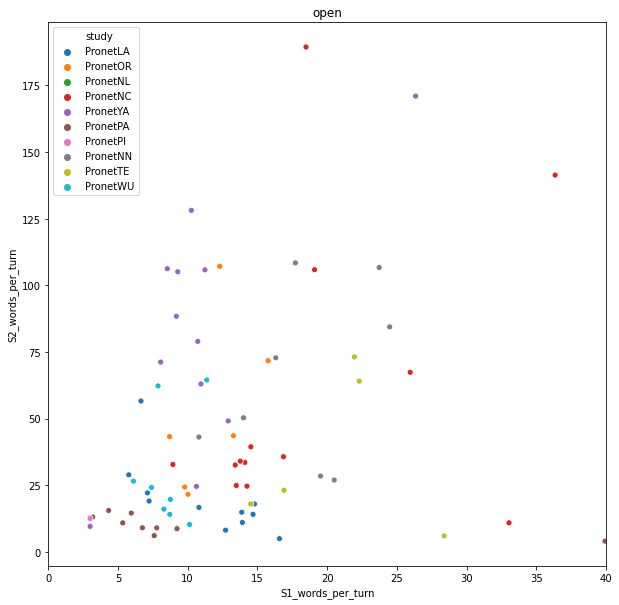

In [34]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="S1_words_per_turn",y="S2_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")
plt.xlim(0,40) # YA outlier probably a case of flipped IDs?

(0.0, 40.0)

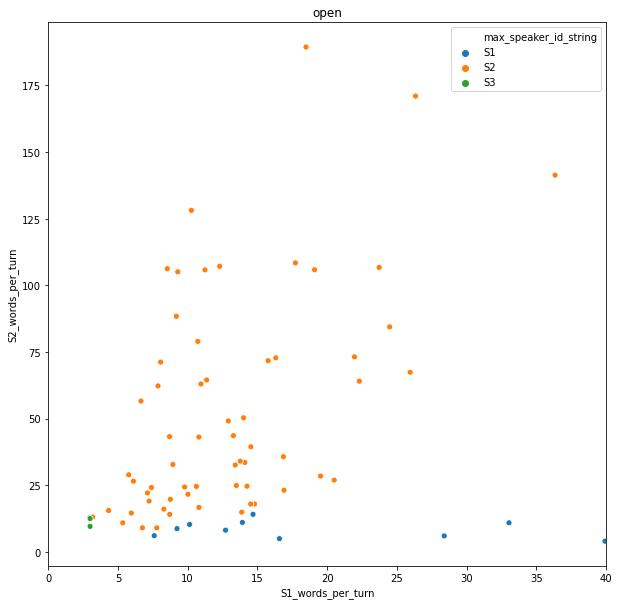

In [36]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="S1_words_per_turn",y="S2_words_per_turn",hue="max_speaker_id_string")
plt.title("open")
plt.xlim(0,40)

### Scatter Plots by Most Speech ID
Using the speaker ID labeled the most talkative now instead, repeat above plots

<AxesSubplot:xlabel='speech_frac', ylabel='max_speaker_words_per_turn'>

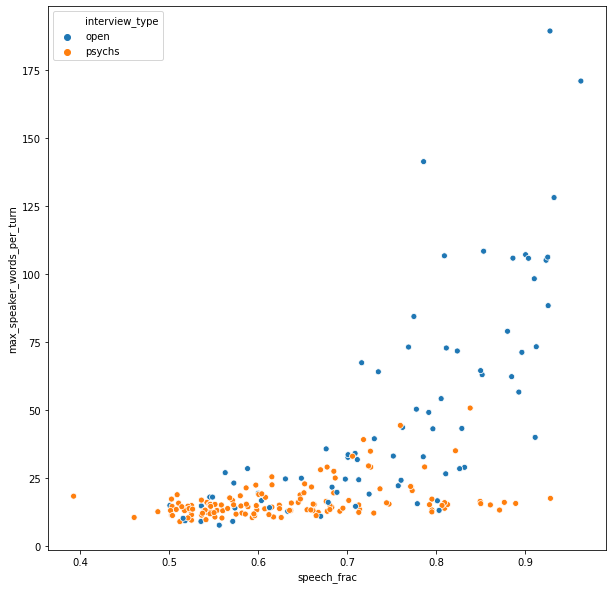

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="speech_frac",y="max_speaker_words_per_turn",hue="interview_type")

<AxesSubplot:xlabel='second_speaker_speech_frac', ylabel='second_speaker_words_per_turn'>

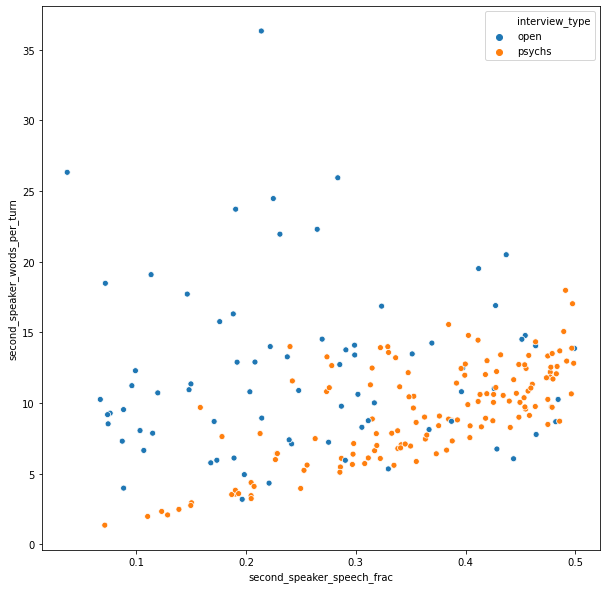

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=cur_qc,x="second_speaker_speech_frac",y="second_speaker_words_per_turn",hue="interview_type")

Text(0.5, 1.0, 'open')

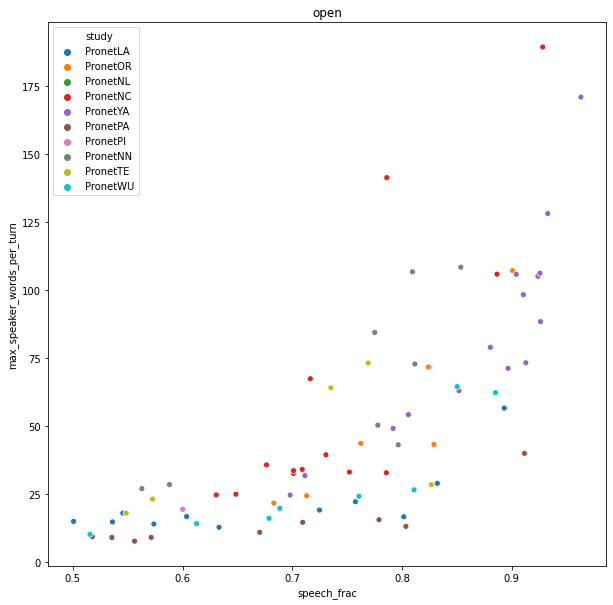

In [40]:
# focus mainly on open interviews
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="speech_frac",y="max_speaker_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

Text(0.5, 1.0, 'open')

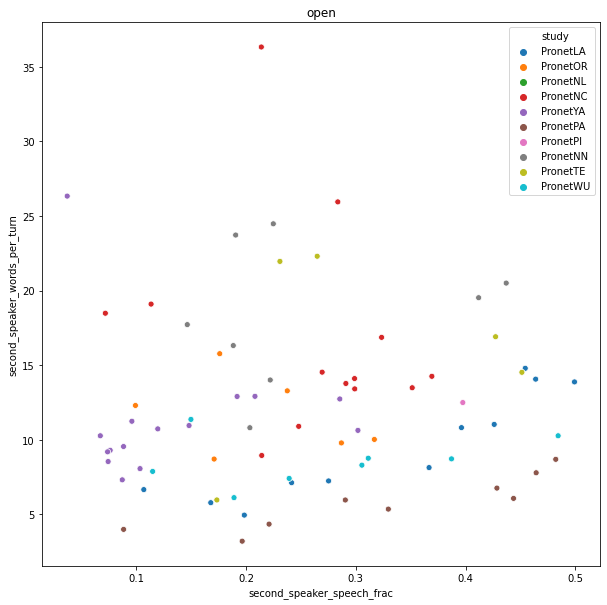

In [41]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_speech_frac",y="second_speaker_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

(0.0, 30.0)

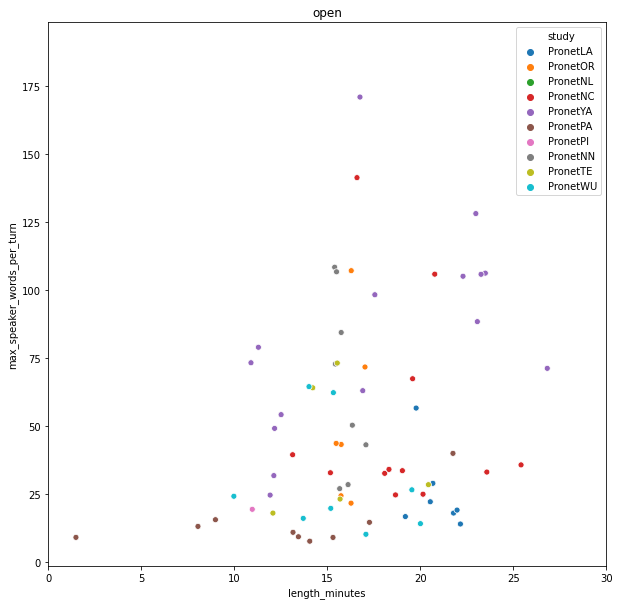

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="length_minutes",y="max_speaker_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")
plt.xlim(0,30)

(0.0, 30.0)

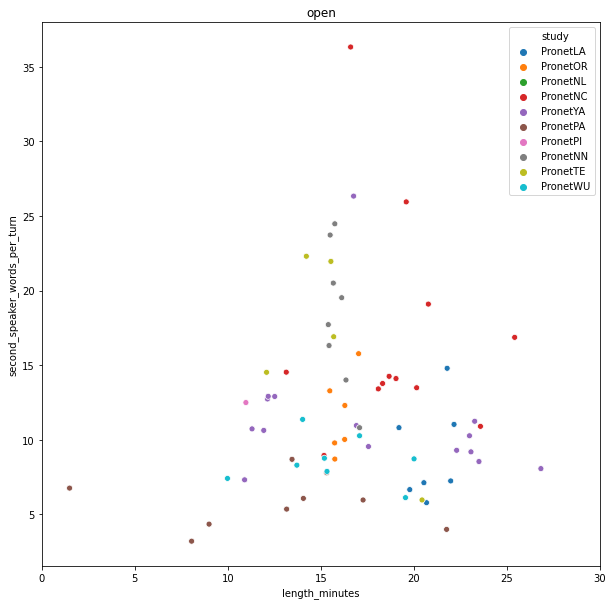

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="length_minutes",y="second_speaker_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")
plt.xlim(0,30)

(0.0, 30.0)

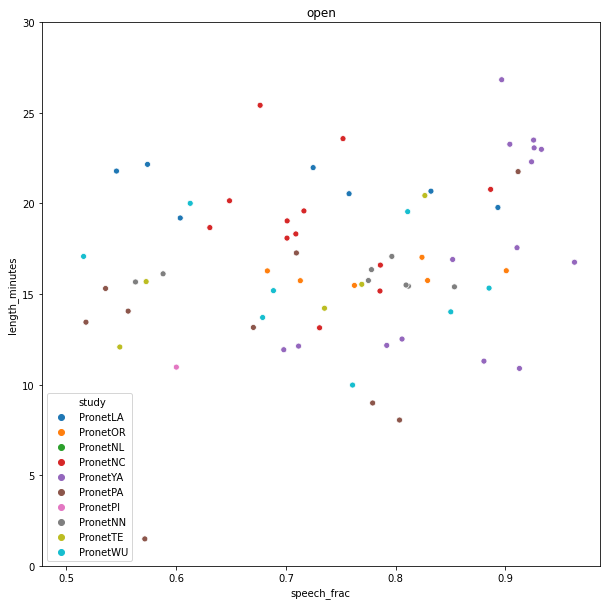

In [44]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="speech_frac",y="length_minutes",hue="study",hue_order=hue_order)
plt.title("open")
plt.ylim(0,30)

Text(0.5, 1.0, 'open')

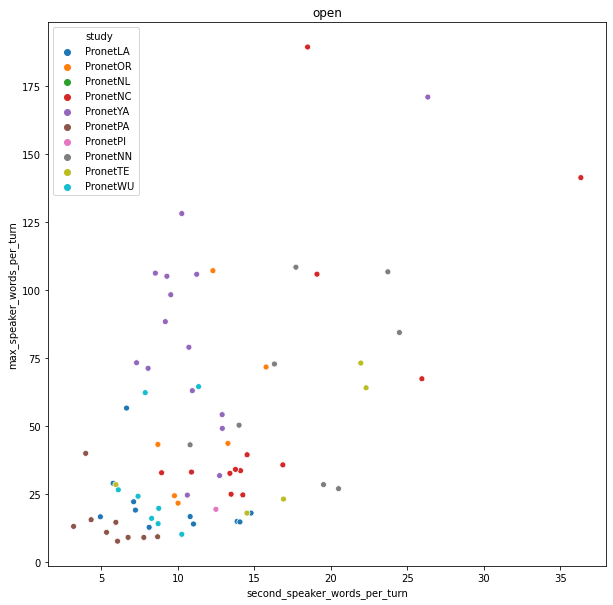

In [45]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="max_speaker_words_per_turn",hue="study",hue_order=hue_order)
plt.title("open")

Text(0.5, 1.0, 'open')

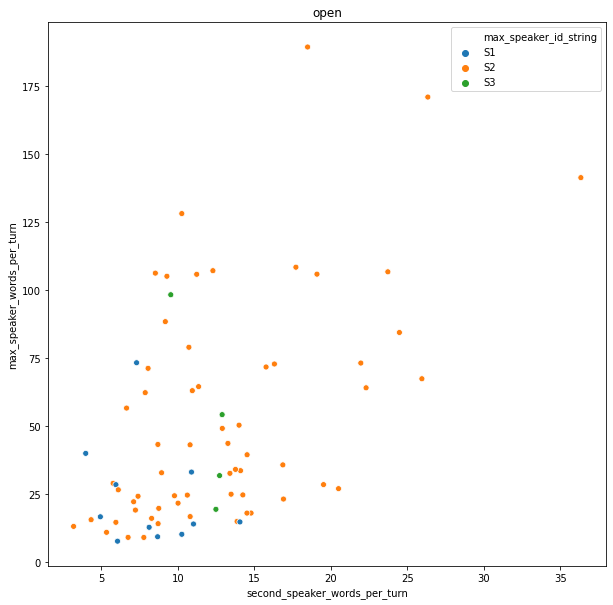

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="max_speaker_words_per_turn",hue="max_speaker_id_string")
plt.title("open")

Text(0.5, 1.0, 'open')

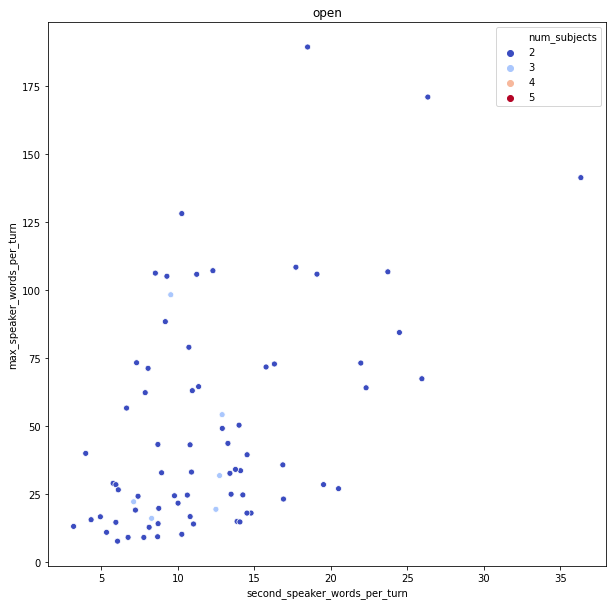

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="max_speaker_words_per_turn",hue="num_subjects",palette='coolwarm',hue_norm=(2,5))
plt.title("open")

Text(0.5, 1.0, 'open')

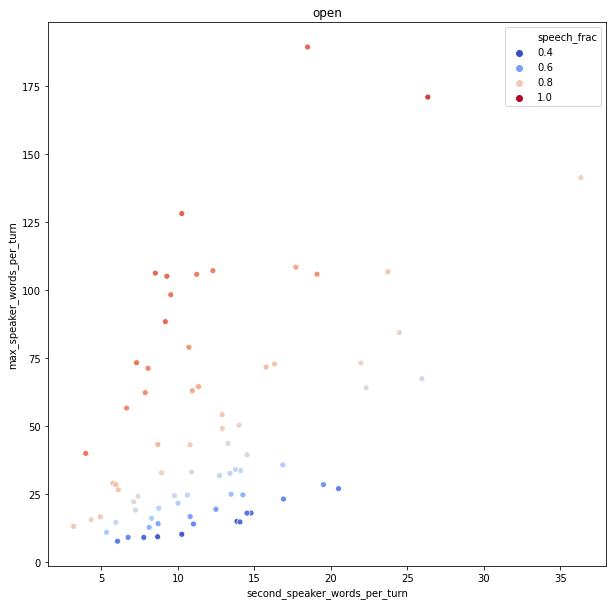

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="max_speaker_words_per_turn",hue="speech_frac",palette='coolwarm',hue_norm=(0.5,1.0))
plt.title("open")

Text(0.5, 1.0, 'open')

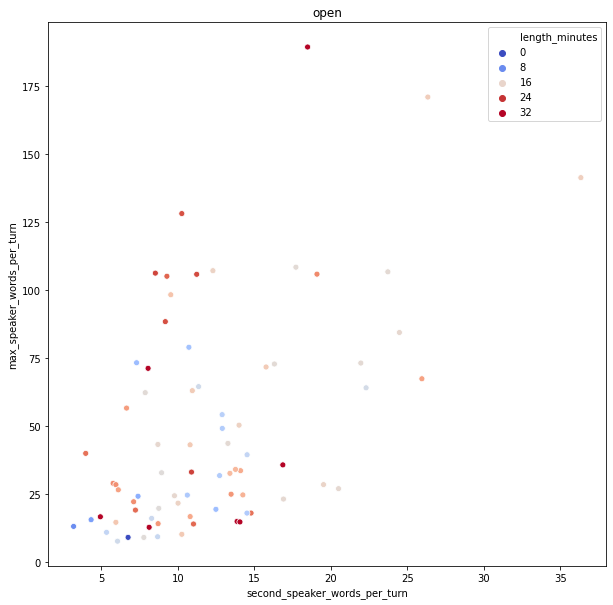

In [52]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="max_speaker_words_per_turn",hue="length_minutes",palette='coolwarm',hue_norm=(5,25))
plt.title("open")

Text(0.5, 1.0, 'open')

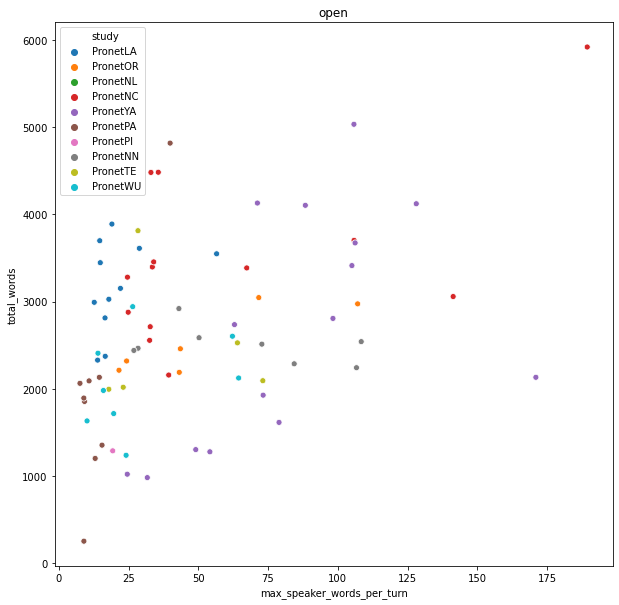

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="max_speaker_words_per_turn",y="total_words",hue="study",hue_order=hue_order)
plt.title("open")

Text(0.5, 1.0, 'open')

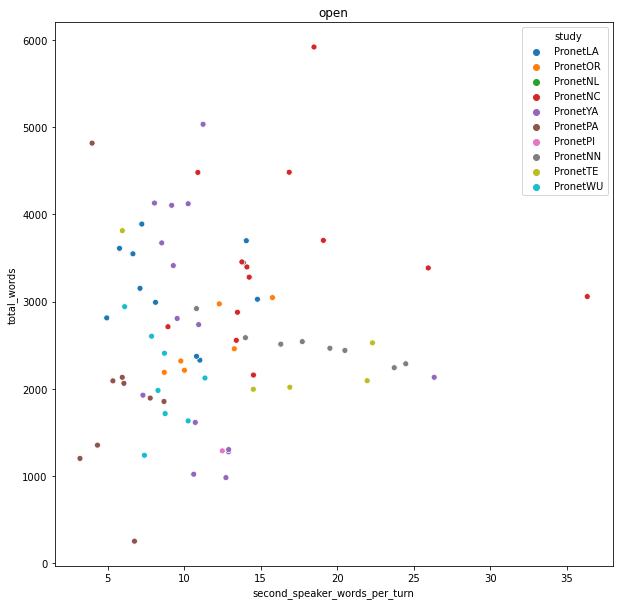

In [53]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=opens,x="second_speaker_words_per_turn",y="total_words",hue="study",hue_order=hue_order)
plt.title("open")